In [1]:
import numpy as np
import pymc as pm
import aesara as ae
import arviz as az
import aeppl

In [2]:
X = np.random.normal(size=100)
y = np.random.normal(X) * 1.2

with pm.Model() as linear_model:
    weights = pm.Normal("weights", mu=0, sigma=1)
    noise = pm.Gamma("noise", alpha=2, beta=1)
    y_observed = pm.Normal(
        "y_observed",
        mu=X @ weights,
        sigma=noise,
        observed=y,
    )

    prior = pm.sample_prior_predictive()
    posterior = pm.sample()
    posterior_pred = pm.sample_posterior_predictive(posterior)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights, noise]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [3]:
with linear_model:
    idata = pm.sample(draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights, noise]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


In [4]:
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

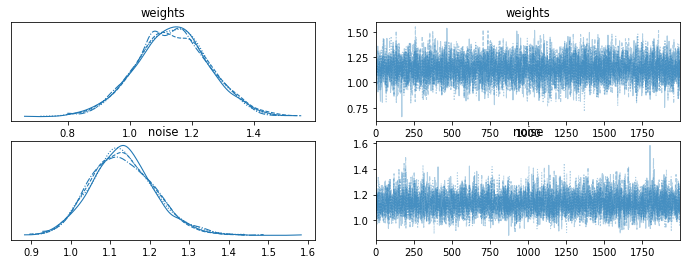

In [5]:
az.plot_trace(idata);

In [6]:
model_diagram = pm.model_to_graphviz(linear_model)
model_diagram.render("model_graph", format="png", cleanup=True)
print("Finished")

Finished


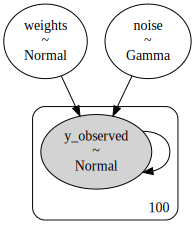

In [7]:
pm.model_to_graphviz(linear_model)

In [8]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sat Jun 04 2022

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.4.0

numpy : 1.22.4
arviz : 0.12.1
aeppl : 0.0.31
aesara: 2.6.6
pymc  : 4.0.0b6

Watermark: 2.3.1

